     地区  人均GDP  城镇人口比重  交通工具消费价格指数  百户拥有汽车量  聚类结果
0    北京   8.05   86.20       95.92    37.71     1
1    天津   8.34   80.50      103.57    20.62     2
2    河北   3.39   45.60       99.03    23.32     3
3    山西   3.13   49.68       98.96    18.60     4
4   内蒙古   5.79   56.62       99.11    19.62     4
5    辽宁   5.07   64.05      100.12    11.15     4
6    吉林   3.84   53.40       97.15    11.24     4
7   黑龙江   3.28   56.50      100.54     5.29     0
8    上海   8.18   89.30      101.58    18.15     2
9    江苏   6.22   61.90       98.95    23.92     1
10   浙江   5.92   62.30       96.69    33.85     1
11   安徽   2.56   44.80      100.25     9.20     0
12   福建   4.72   58.10      100.75    17.83     4
13   江西   2.61   45.70      100.91     8.88     0
14   山东   4.71   50.95       98.50    28.12     1
15   河南   2.87   40.57      100.59    14.06     0
16   湖北   3.41   51.83      101.15     9.69     0
17   湖南   2.98   45.10      100.02    12.82     0
18   广东   5.07   66.50       97.55    30.71     1


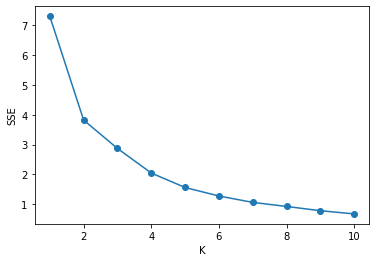

[0 2 1 1 0 1 1 3 2 0 0 3 1 3 0 3 3 3 0 3 3 3 3 3 4 4 3 3 3 3 3]


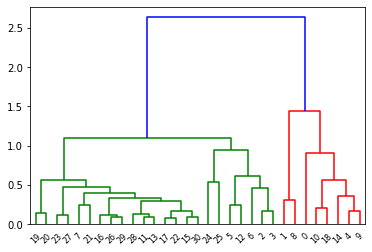

In [8]:
# 使用KMeans进行聚类
from sklearn.cluster import KMeans
from sklearn import preprocessing
import pandas as pd
import numpy as np

# 数据加载

data = pd.read_csv('.\car_data.csv',encoding ='gbk')
train_x = data[["人均GDP","城镇人口比重","交通工具消费价格指数","百户拥有汽车量"]]

# 规范化到 [0,1] 空间
min_max_scaler=preprocessing.MinMaxScaler()
train_x=min_max_scaler.fit_transform(train_x)


### 使用KMeans聚类,分成五类
kmeans = KMeans(n_clusters=5)
kmeans.fit(train_x)
predict_y = kmeans.predict(train_x)
# 合并聚类结果，插入到原数据中
result = pd.concat((data,pd.DataFrame(predict_y)),axis=1)
result.rename({0:u'聚类结果'},axis=1,inplace=True)
# 将结果导出到CSV文件中
print(result)
result.to_csv(".\car_data_result.csv",index=False,encoding ='gbk')

# K-Means 手肘法：统计不同K取值的误差平方和
import matplotlib.pyplot as plt
sse = []
for k in range(1, 11):
	# kmeans算法
	kmeans = KMeans(n_clusters=k)
	kmeans.fit(train_x)
	# 计算inertia簇内误差平方和
	sse.append(kmeans.inertia_)
x = range(1, 11)
plt.xlabel('K')
plt.ylabel('SSE')
plt.plot(x, sse, 'o-')
plt.show()

### 使用层次聚类
from scipy.cluster.hierarchy import dendrogram, ward
from sklearn.cluster import KMeans, AgglomerativeClustering
import matplotlib.pyplot as plt
model = AgglomerativeClustering(linkage='ward', n_clusters=5)
y = model.fit_predict(train_x)
print(y)

##层次聚类画图
linkage_matrix = ward(train_x)
dendrogram(linkage_matrix)
plt.show()